In [1]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
from pandas.plotting import scatter_matrix

In [2]:
file = 'clt_temps.csv'


In [3]:
df = pd.read_csv(file, encoding="ISO-8859-1")

In [4]:
df.head()

,date_time,avg_temp,precip_water,snow,snow_ice_depth
0,1948-09-01,71.5,0.00,0.0,0.0
1,1948-09-02,69.0,0.00,0.0,0.0
2,1948-09-03,72.0,0.00,0.0,0.0
3,1948-09-04,69.0,0.29,0.0,0.0
4,1948-09-05,72.0,0.06,0.0,0.0


In [5]:
score_df = df.loc[:, ["date_time", "avg_temp", "precip_water", "snow", "snow_ice_depth"]]

In [6]:

score_df.head()

,date_time,avg_temp,precip_water,snow,snow_ice_depth
0,1948-09-01,71.5,0.00,0.0,0.0
1,1948-09-02,69.0,0.00,0.0,0.0
2,1948-09-03,72.0,0.00,0.0,0.0
3,1948-09-04,69.0,0.29,0.0,0.0
4,1948-09-05,72.0,0.06,0.0,0.0


In [7]:
score_df["precip"] = score_df["snow"] + score_df["snow_ice_depth"] + score_df["precip_water"]
   

In [8]:
score_df.head(5)


,date_time,avg_temp,precip_water,snow,snow_ice_depth,precip
0,1948-09-01,71.5,0.00,0.0,0.0,0.00
1,1948-09-02,69.0,0.00,0.0,0.0,0.00
2,1948-09-03,72.0,0.00,0.0,0.0,0.00
3,1948-09-04,69.0,0.29,0.0,0.0,0.29
4,1948-09-05,72.0,0.06,0.0,0.0,0.06


In [9]:
conditions = [
    (score_df['precip'] == 0.00) & (score_df['avg_temp'] >= 70) & (score_df['avg_temp'] <= 80)]
choices = [2]
score_df['score'] = np.select(conditions, choices, default=1)

In [10]:
score_df.head()

,date_time,avg_temp,precip_water,snow,snow_ice_depth,precip,score
0,1948-09-01,71.5,0.00,0.0,0.0,0.00,2
1,1948-09-02,69.0,0.00,0.0,0.0,0.00,1
2,1948-09-03,72.0,0.00,0.0,0.0,0.00,2
3,1948-09-04,69.0,0.29,0.0,0.0,0.29,1
4,1948-09-05,72.0,0.06,0.0,0.0,0.06,1


In [11]:
score_df.to_csv('scored.csv')

In [12]:
score_df.corr().style.background_gradient()

,avg_temp,precip_water,snow,snow_ice_depth,precip,score
avg_temp,1,0.0132684,-0.106843,-0.139758,-0.116617,0.433078
precip_water,0.0132684,1,0.082157,0.0111694,0.600294,-0.162994
snow,-0.106843,0.082157,1,0.300252,0.643726,-0.0250891
snow_ice_depth,-0.139758,0.0111694,0.300252,1,0.694051,-0.0327979
precip,-0.116617,0.600294,0.643726,0.694051,1,-0.120182
score,0.433078,-0.162994,-0.0250891,-0.0327979,-0.120182,1


In [13]:
x = score_df[["avg_temp","precip"]]
x.head()

,avg_temp,precip
0,71.5,0.00
1,69.0,0.00
2,72.0,0.00
3,69.0,0.29
4,72.0,0.06


In [14]:
y = score_df["score"]
y.head()

0    2
1    1
2    2
3    1
4    1
Name: score, dtype: int64

In [15]:
# x= score_df.avg_temp.values.reshape(-1, 1)
y= score_df.score.values.reshape(-1, 1)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [17]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(x, y)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(x_train, y_train)
predictions = model.predict(x_test)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
np.unique(predictions)

array([1, 2])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["good day", "bad day"]))

              precision    recall  f1-score   support

    good day       0.86      0.91      0.89      5346
     bad day       0.44      0.32      0.37      1154

   micro avg       0.81      0.81      0.81      6500
   macro avg       0.65      0.62      0.63      6500
weighted avg       0.79      0.81      0.80      6500



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27927198>,
      dtype=object)

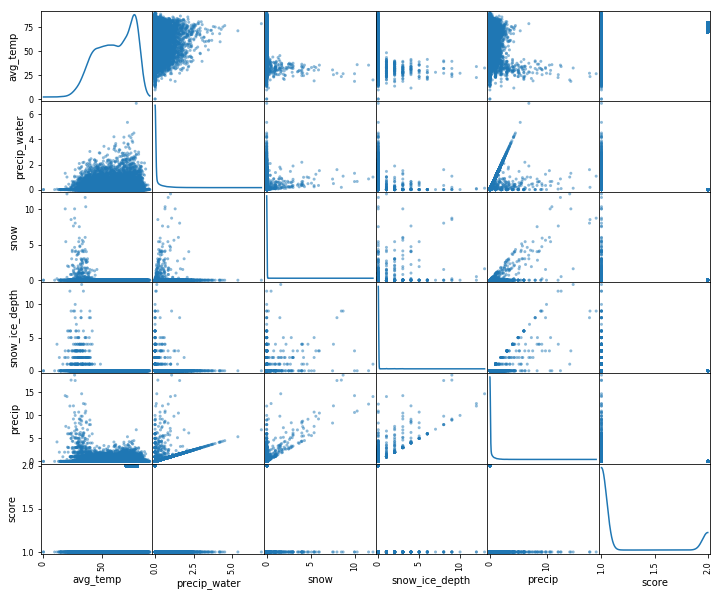

In [21]:
scatter_matrix(score_df.loc[:, 'date_time':'score'], figsize = (12,10), diagonal='kde')